In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import clear_output

In [40]:
def metropolis_ising(T,runtime,N=None,grid=None,animate=False):
    """grid: if you choose to initialize with previous image"""
    J = 1 #strength of interaction (Joules)
    k = 1 # Joules per kelvin
    if grid is not None:
        N1,N2 = grid.shape[0], grid.shape[1]
    else:
        grid = 2*np.random.randint(2, size = (N1,N2)) - 1 #random initial configuration with 1s and -1s
        
    for t in range(runtime):
        #sum of interactions at each spin site (vectorized!)
        interactions = sum([np.roll(grid,shift =(0, 1), axis = 1),
                            np.roll(grid,shift =(0, -1), axis = 1),
                            np.roll(grid,shift =(1, 0), axis = 0), # have to change axis because unlike MATLAB's circshift, np.roll sees shifts (0,1) == (1,0)
                            np.roll(grid,shift =(-1, 0), axis = 0)])
        # change in energy of flipping a spin
        DeltaE = 2 * J * (grid * interactions) # element wise multiplication
        # transition probabilities
        p_trans = np.exp(-DeltaE/(k * T)) # according to the Boltzmann distribution
        # accepting or rejecting spin flips in one fell swoop!
        # assigning uniformly distributed values to each site, then checking if they are less than transition prob or less than 0.1?
        transitions = (np.random.random((N1,N2)) < p_trans ) * (np.random.random((N1,N2)) < 0.1) * -2 + 1
        grid = grid * transitions
        if animate:
            plt.figure(figsize=(6,6)) 
            plt.imshow(grid,cmap='gray')
            plt.axis('off')
            clear_output(wait=True)
            plt.show()
    if not animate:
        plt.figure(figsize=(8,8)) 
        plt.imshow(grid,cmap='winter')
        plt.axis('off')
        plt.show()

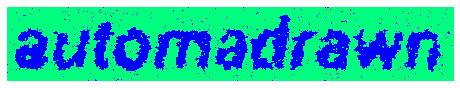

In [41]:
x = mpimg.imread('./img/clean_logo.png')
x[x<=.1] = -1
x[x>.1]=1
x = x[:, :524]
x = x[:, :, 0]

metropolis_ising(T=1.7,runtime=120,grid=x)